In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Test cases we will use to evaluate our perceptrons later

# We will use truth tables, which represent the logical operators. In each row,
# the first two columns are the operator inputs, and the last column is the
# expected output

# The AND operation
and_table = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 1]
])
and_X = and_table[:, 0:2]
and_Y = and_table[:, 2]

# The OR operation
or_table = np.array([
    [0, 0, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])
or_X = or_table[:, 0:2]
or_Y = or_table[:, 2]

# The XOR operation
xor_table = np.array([
    [0, 0, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 0]
])
xor_X = xor_table[:, 0:2]
xor_Y = xor_table[:, 2]

In [ ]:
class Perceptron:

  def __init__(self, weights: list[float] = [0, 0], bias: float = 0.0, threshold: float = 0):
    self.weights = weights
    self.bias = bias
    self.threshold = threshold

  def forward(self, inputs):
    # Return the weighted sum of the inputs and bias
    if len(inputs) != len(self.weights):
      raise ValueError("Lengths of inputs and weights not the same!")

    total = self.bias
    for i in range(len(inputs)):
      total += inputs[i] * self.weights[i]

    return total

  def decision(self, inputs):
    # Make a binary decision on the inputs by considering if the weighted sum is greater than the threshold
    return self.forward(inputs) >= self.threshold

  def eval_case(self, table):
    # Helper method to print out the model's attempt at solving a specfic table
    for test_case in table:
      test_in, test_out = test_case[0:2], test_case[2]
      print(f"Test case: {test_in}, p(x) = {self.forward(test_in):.3f}, decision: {int(self.decision(test_in))}, True value: {test_out}")
    self.plot_decision_boundary(table)

  def train_single(self, input, target, learning_rate = 0.1):
    # Implementation of the Perceptron Learning Rule
    # Given the model's output, we can directly calculate the contribution of
    # the weights and bias value to the output, and whether it got the answer
    # correct. If it did NOT get the answer correct, adjust the bias and
    # weights accordingly

    y_hat = self.decision(input)
    error = int(target) - int(y_hat)

    for i in range(len(input)):
      self.weights[i] += input[i] * error * learning_rate

    self.bias += error * learning_rate

    return error != 0

  def train_dataset(self, inputs, max_epochs=10, display_eval=True):
    # One training example isn't enough to linearly separate the whole
    # dataset, we need to loop through the entire dataset and train on
    # each example in turn.

    # Because it is possible that the data isn't linearly separable but
    # we don't find the right solution the first time around, perform multiple
    # "epochs", which is a single run through the whole training dataset.
    for epoch in range(max_epochs):

      if display_eval:
        self.eval_case(inputs)

      errors = 0
      for i in range(len(inputs)):
        input = inputs[i, 0:2]
        target = inputs[i, 2]

        had_error = self.train_single(input, target)
        if had_error:
          errors += 1

      if errors == 0:
        print(f"Converged after {epoch + 1} epochs")
        break

    if errors > 0:
      print(f"Failed to converge after {max_epochs} epochs")


  def plot_decision_boundary(self, inputs):
    # Assume for now we only have 2 inputs

    x_vals = np.linspace(-0.1, 1.1, 200)
    y_vals = np.linspace(-0.1, 1.1, 200)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Compute activation value: w1*x + w2*y + b
    Z = self.weights[0] * X + self.weights[1] * Y + self.bias

    # Apply thresholding
    Z_class = (Z > self.threshold).astype(int)

    # Plotting
    plt.contourf(X, Y, Z_class, levels=1, alpha=0.4, cmap="RdYlGn")

    # Datapoints
    plt.scatter(inputs.T[0], inputs.T[1], c=inputs.T[2] == 0, s=200, cmap='binary')

    # Making things look pretty
    plt.grid(True)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [ ]:
p = Perceptron([1.0, 1.0], bias=-1.5, threshold=0)

Our linear decision boundary looks something like this

$$pos = w_1 x_1 + w_2 x_2 + b >= threshold$$

$$neg = w_1 x_1 + w_2 x_2 + b < threshold$$

Test case: [0 0], p(x) = -1.500, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.500, decision: 0, True value: 0
Test case: [0 1], p(x) = -0.500, decision: 0, True value: 0
Test case: [1 1], p(x) = 0.500, decision: 1, True value: 1


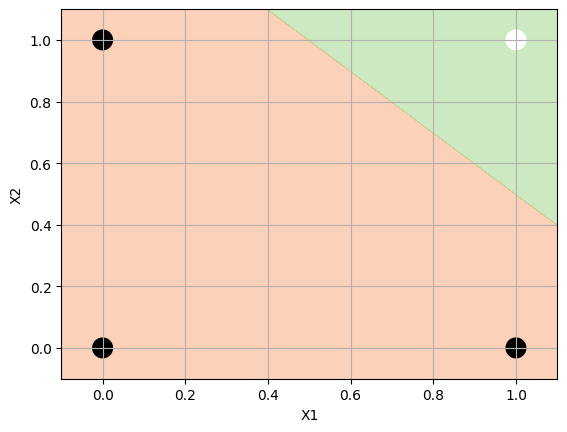

In [ ]:
p.eval_case(and_table)

Test case: [0 0], p(x) = -1.500, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.500, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.500, decision: 0, True value: 1
Test case: [1 1], p(x) = 0.500, decision: 1, True value: 1


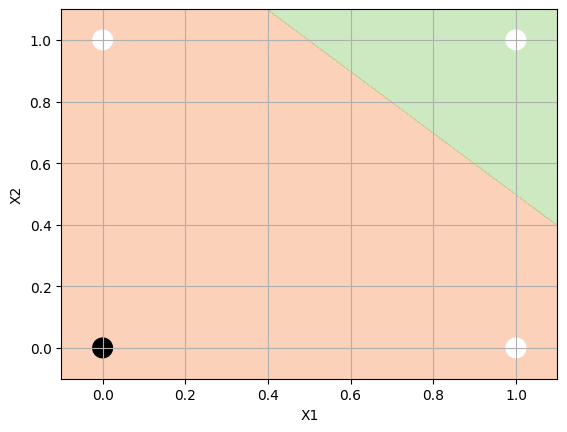

In [ ]:
p.eval_case(or_table)

Test case: [0 0], p(x) = -0.500, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.500, decision: 1, True value: 1
Test case: [0 1], p(x) = 0.500, decision: 1, True value: 1
Test case: [1 1], p(x) = 1.500, decision: 1, True value: 1


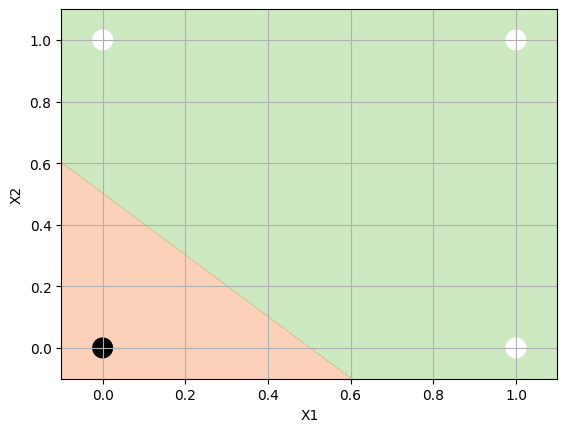

In [ ]:
p_for_or = Perceptron(p.weights, p.bias + 1.0, p.threshold)
p_for_or.eval_case(or_table)

Test case: [0 0], p(x) = -0.235, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.597, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.427, decision: 0, True value: 1


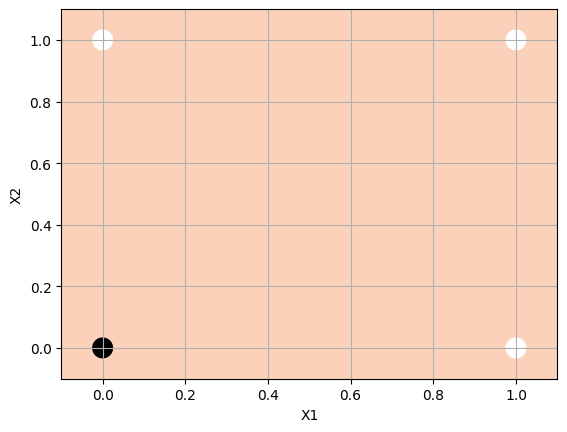

In [ ]:
import random
p = Perceptron([random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5)], random.uniform(-0.5, 0.5), 0)
p.eval_case(or_table)

Test case: [0 0], p(x) = -0.235, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.597, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.427, decision: 0, True value: 1


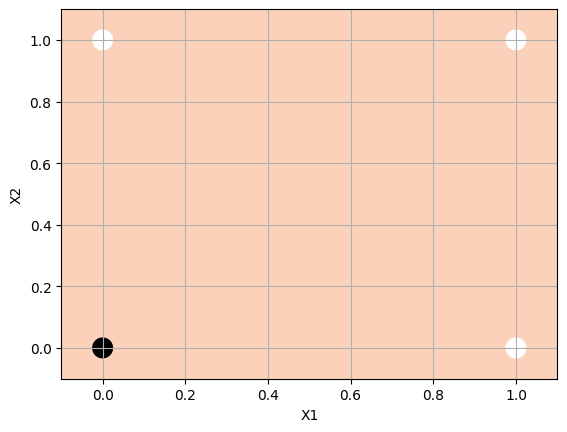

Test case: [0 0], p(x) = -0.035, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.197, decision: 0, True value: 1
Test case: [0 1], p(x) = 0.236, decision: 1, True value: 1
Test case: [1 1], p(x) = 0.073, decision: 1, True value: 1


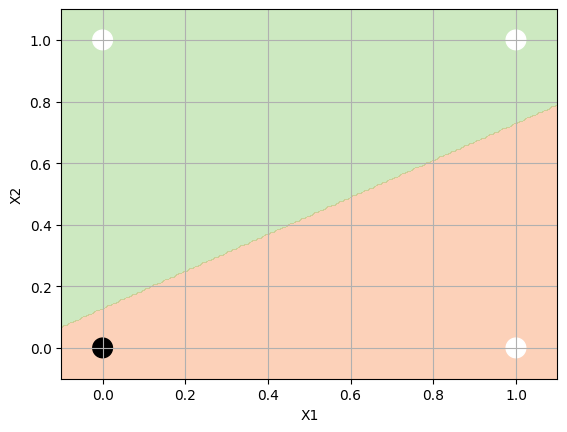

Test case: [0 0], p(x) = 0.065, decision: 1, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 1
Test case: [0 1], p(x) = 0.336, decision: 1, True value: 1
Test case: [1 1], p(x) = 0.273, decision: 1, True value: 1


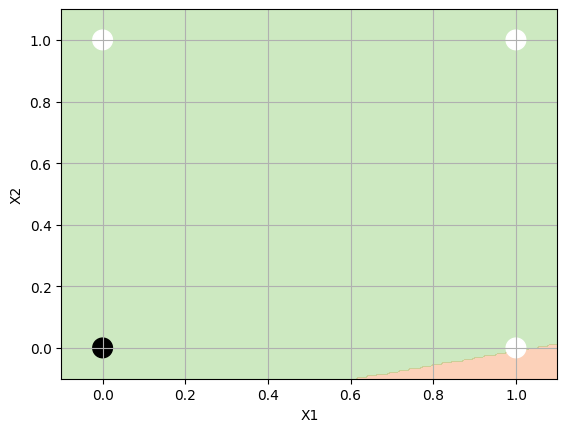

Test case: [0 0], p(x) = 0.065, decision: 1, True value: 0
Test case: [1 0], p(x) = 0.103, decision: 1, True value: 1
Test case: [0 1], p(x) = 0.336, decision: 1, True value: 1
Test case: [1 1], p(x) = 0.373, decision: 1, True value: 1


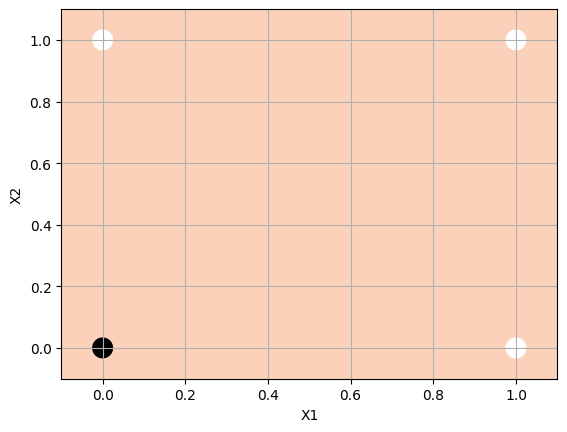

Test case: [0 0], p(x) = -0.035, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 1
Test case: [0 1], p(x) = 0.236, decision: 1, True value: 1
Test case: [1 1], p(x) = 0.273, decision: 1, True value: 1


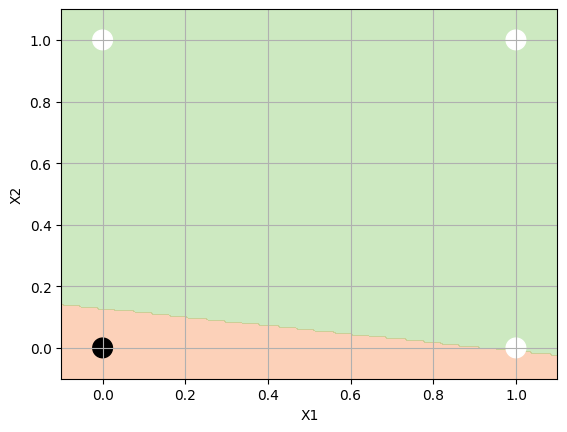

Converged after 5 epochs


In [ ]:
p.train_dataset(or_table)

Test case: [0 0], p(x) = -0.035, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 0
Test case: [0 1], p(x) = 0.236, decision: 1, True value: 0
Test case: [1 1], p(x) = 0.273, decision: 1, True value: 1


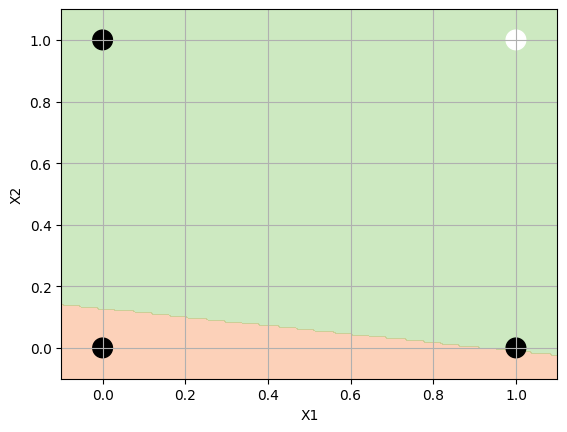

Test case: [0 0], p(x) = -0.135, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 0
Test case: [0 1], p(x) = 0.136, decision: 1, True value: 0
Test case: [1 1], p(x) = 0.173, decision: 1, True value: 1


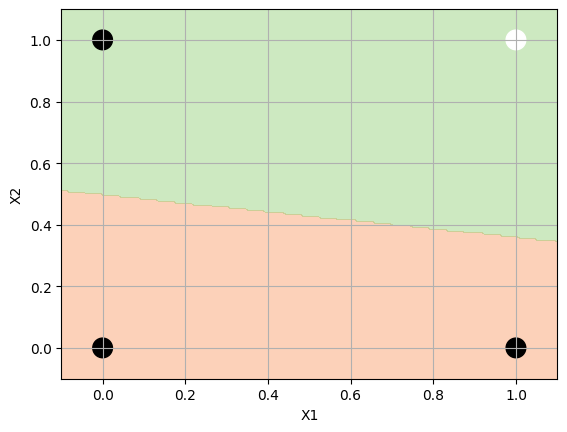

Test case: [0 0], p(x) = -0.135, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 0
Test case: [0 1], p(x) = 0.136, decision: 1, True value: 0
Test case: [1 1], p(x) = 0.273, decision: 1, True value: 1


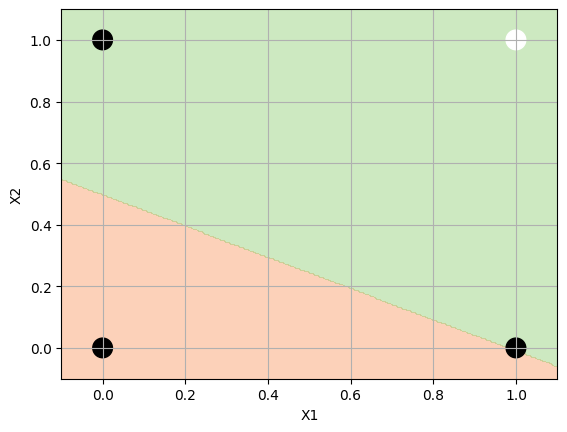

Test case: [0 0], p(x) = -0.235, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 0
Test case: [0 1], p(x) = 0.036, decision: 1, True value: 0
Test case: [1 1], p(x) = 0.173, decision: 1, True value: 1


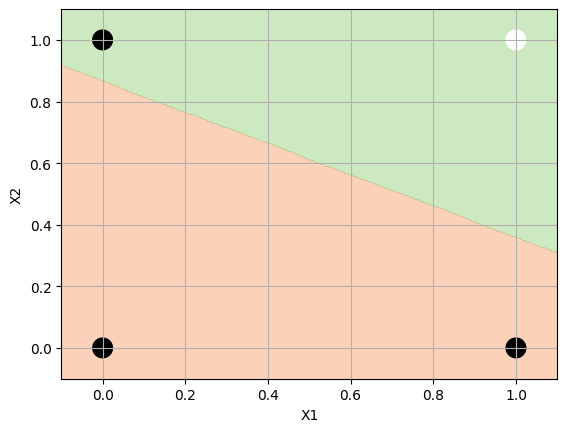

Test case: [0 0], p(x) = -0.235, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 0
Test case: [0 1], p(x) = 0.036, decision: 1, True value: 0
Test case: [1 1], p(x) = 0.273, decision: 1, True value: 1


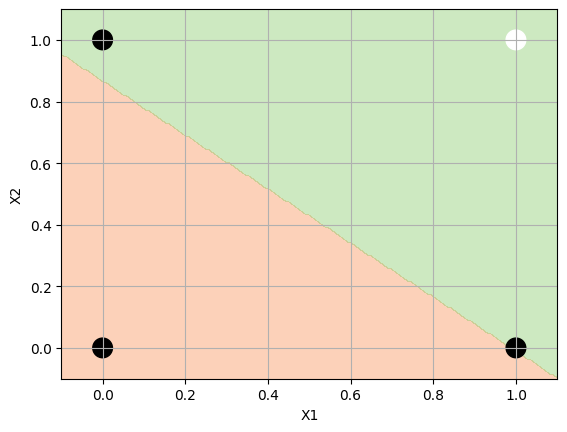

Test case: [0 0], p(x) = -0.335, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.197, decision: 0, True value: 0
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 0
Test case: [1 1], p(x) = 0.073, decision: 1, True value: 1


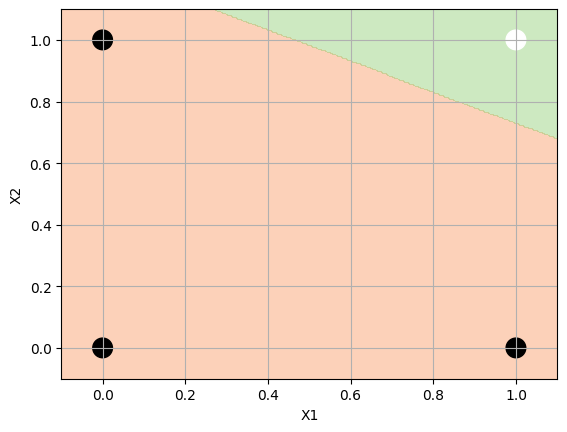

Converged after 6 epochs


In [ ]:
p.train_dataset(and_table)

Test case: [0 0], p(x) = -0.335, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.197, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = 0.073, decision: 1, True value: 0


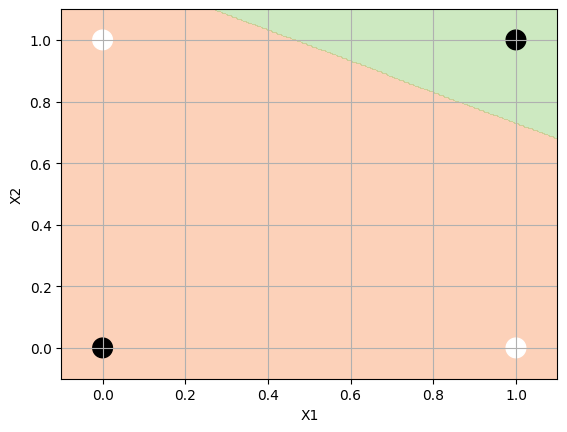

Test case: [0 0], p(x) = -0.335, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.197, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.164, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.027, decision: 0, True value: 0


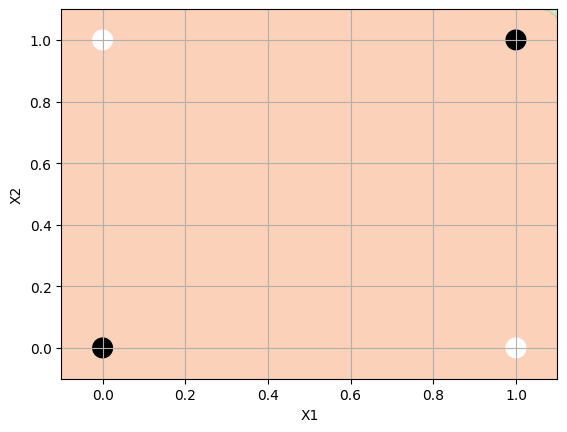

Test case: [0 0], p(x) = -0.235, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = 0.073, decision: 1, True value: 0


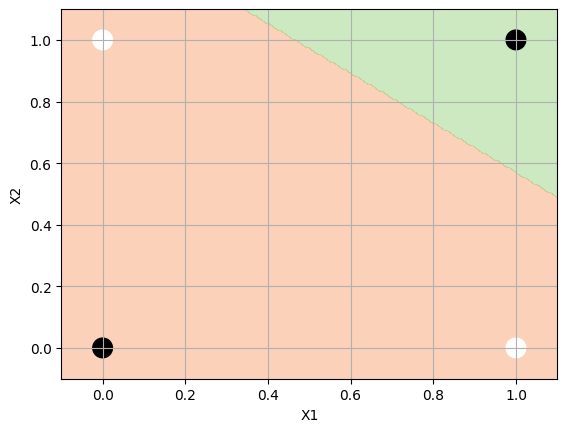

Test case: [0 0], p(x) = -0.235, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.164, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.027, decision: 0, True value: 0


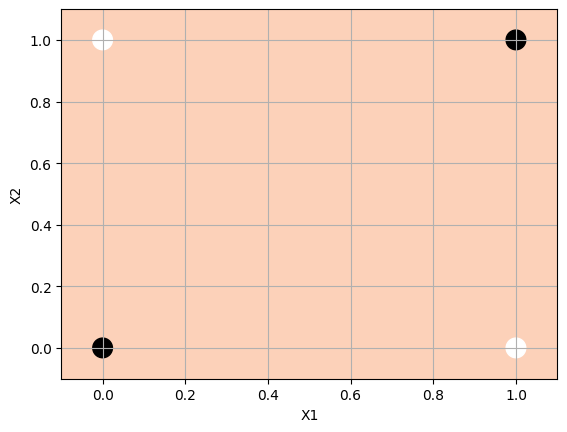

Test case: [0 0], p(x) = -0.135, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = 0.073, decision: 1, True value: 0


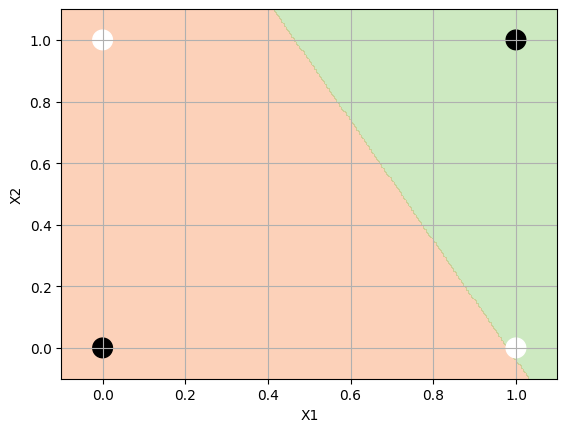

Test case: [0 0], p(x) = -0.135, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.027, decision: 0, True value: 0


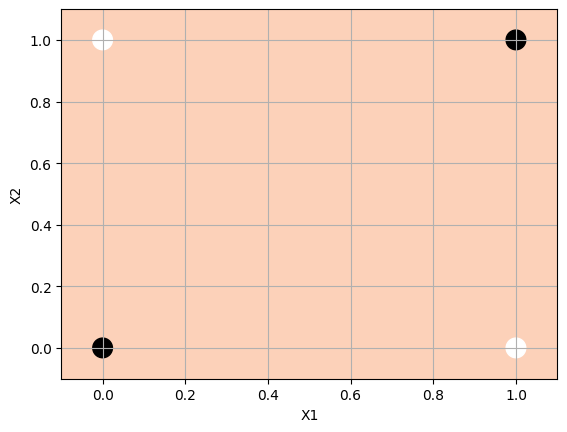

Test case: [0 0], p(x) = -0.135, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.164, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.127, decision: 0, True value: 0


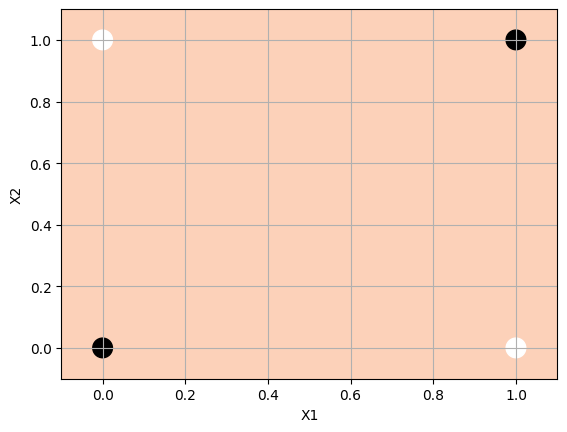

Test case: [0 0], p(x) = -0.035, decision: 0, True value: 0
Test case: [1 0], p(x) = 0.003, decision: 1, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.027, decision: 0, True value: 0


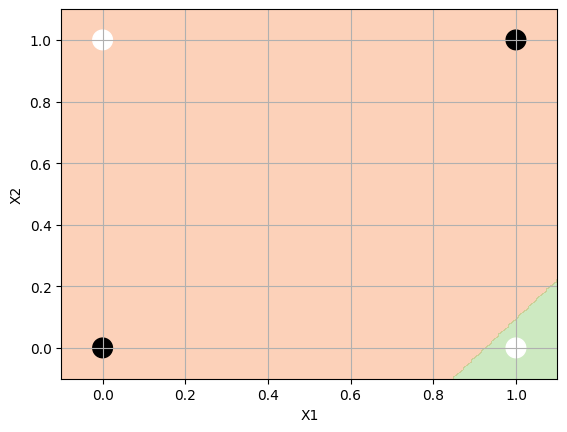

Test case: [0 0], p(x) = -0.035, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.064, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.127, decision: 0, True value: 0


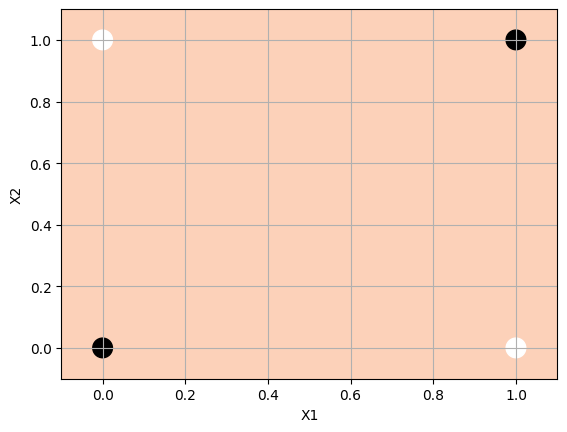

Test case: [0 0], p(x) = -0.035, decision: 0, True value: 0
Test case: [1 0], p(x) = -0.097, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.164, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.227, decision: 0, True value: 0


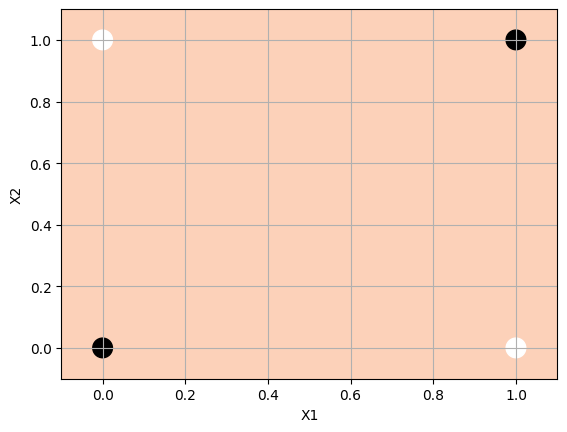

Failed to converge after 10 epochs


In [ ]:
p.train_dataset(xor_table)

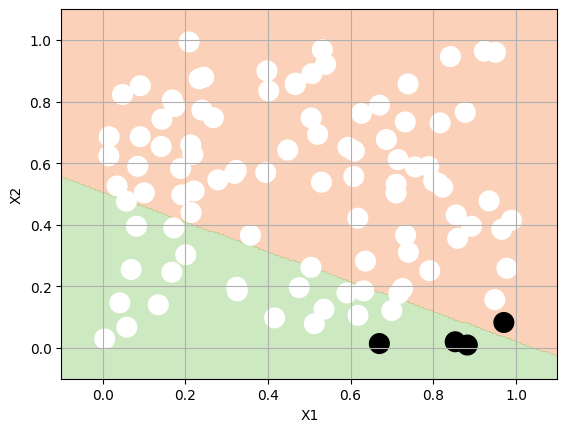

In [ ]:
# Let's create a random table with lots of values to see if this still works

random_table = np.random.random((100, 2))
decisions = (random_table[:, 0] * -0.24) + (random_table[:, 1] * 2.1) + 4 > 4

random_table = np.hstack([random_table, decisions.reshape(100, 1)])

p.plot_decision_boundary(random_table)

In [ ]:
p.train_dataset(random_table, 100, False)

Converged after 98 epochs


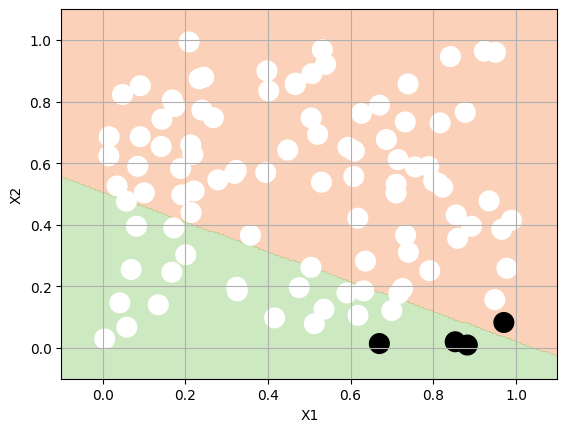

In [ ]:
p.plot_decision_boundary(random_table)

# So now what?
We saw we can't solve the XOR problem though, are we stuck?

### Not necessarily...

What if we combine multiple perceptrons?

We know we can solve the OR problem and we know we can solve the AND problem. If we can express the XOR problem in terms of these two problems we can combine their solutions to solve the XOR problem

Luckily we can!

XOR can be broken down into

(A OR B) AND NOT (A AND B)

In [ ]:
# First create and train perceptrons that will be able to solve the AND and OR problems
and_perceptron = Perceptron()
and_perceptron.train_dataset(and_table, display_eval=False)

or_perceptron = Perceptron()
or_perceptron.train_dataset(or_table, display_eval=False)

# Then use their outputs to create a new truth table
new_table = []
for i in range(len(xor_table)):
  and_decision = int(and_perceptron.decision(xor_X[i]))
  or_decision = int(or_perceptron.decision(xor_X[i]))
  print(f"{and_decision} ? {or_decision} = {xor_Y[i]}")

  new_table_row = [and_decision, or_decision, int(xor_Y[i])]
  new_table.append(new_table_row)

print()
new_table = np.array(new_table)
print(new_table)

Converged after 4 epochs
Converged after 2 epochs
0 ? 0 = 0
0 ? 1 = 1
0 ? 1 = 1
1 ? 1 = 0

[[0 0 0]
 [0 1 1]
 [0 1 1]
 [1 1 0]]


This new truth table made from the outputs of an AND and an OR gate is linearly separable! We can now train a new perceptron to solve it!

In [ ]:
xor_perceptron = Perceptron()
xor_perceptron.train_dataset(new_table, max_epochs=10, display_eval=False)

Converged after 5 epochs


# Conclusion
Think about why we needed to use the .decision method instead of the .forward one.



# Task
1. Create truth tables for NAND and NOR
2. Show that these are linearly separable
3. Show why the inversion of any linearly separable truth table is also linearly separable
4. Think about what we would need to be able to train much larger networks of perceptrons?

In [ ]:
# The NAND (!AND) operation
nand_table = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 0]
])
nand_X = nand_table[:, 0:2]
nand_Y = nand_table[:, 2]

# The NOR (!OR) operation
nor_table = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0]
])
nor_X = nor_table[:, 0:2]
nor_Y = nor_table[:, 2]

Test case: [0 0], p(x) = -0.014, decision: 0, True value: 1
Test case: [1 0], p(x) = -0.068, decision: 0, True value: 1
Test case: [0 1], p(x) = -0.286, decision: 0, True value: 1
Test case: [1 1], p(x) = -0.341, decision: 0, True value: 0


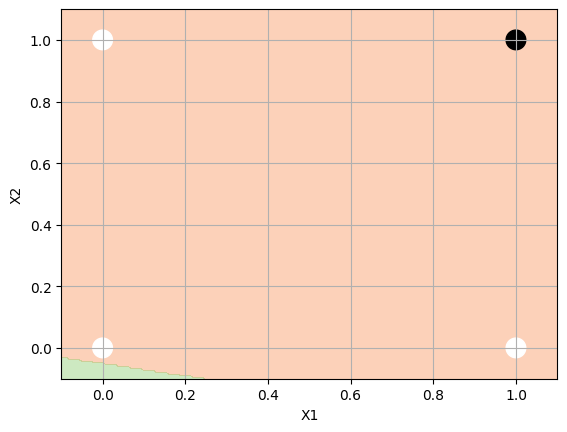

Test case: [0 0], p(x) = -0.014, decision: 0, True value: 1
Test case: [1 0], p(x) = -0.068, decision: 0, True value: 0
Test case: [0 1], p(x) = -0.286, decision: 0, True value: 0
Test case: [1 1], p(x) = -0.341, decision: 0, True value: 0


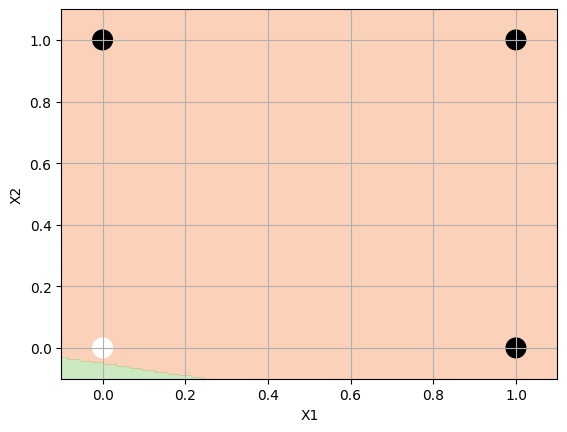

In [ ]:
p.eval_case(nand_table)
p.eval_case(nor_table)